# 회귀를 통한 보스턴 주택 가격 예측

In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X,test_Y) = boston_housing.load_data()

print(len(train_X), len(test_X))
print(train_X[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


이 데이터 속성들은 다 단위가 다르다.

이와 같은 경우는 전처리에서 Standardization해야 학습 효율이 좋다.

In [12]:
#데이터 전처리(정규화)

x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)

train_X-=x_mean
train_X/=x_std
test_X-=x_mean
test_X/=x_std

y_mean=train_Y.mean(axis=0)
y_std=train_Y.std(axis=0)
train_Y-=y_mean
train_Y/=y_std
test_Y-=y_mean
test_Y/=y_std

print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


In [13]:
# 회귀 모델 만들기[신경망]

#unit값을 정할 때, 처음에는 많은 units값이 좋음 -> 신경망층 깊어질수록 조금씩 줄이기
model=tf.keras.Sequential([
                     tf.keras.layers.Dense(units=52, activation='relu',input_shape=(13, )),
                     tf.keras.layers.Dense(units=39, activation='relu'),
                     tf.keras.layers.Dense(units=26, activation='relu'),
                     tf.keras.layers.Dense(units=1)
])

model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.07), loss='mse')

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 52)                728       
_________________________________________________________________
dense_11 (Dense)             (None, 39)                2067      
_________________________________________________________________
dense_12 (Dense)             (None, 26)                1040      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


In [14]:
#val_loss: 검증 데이터를 활용한 loss값
history=model.fit(train_X, train_Y, epochs=100, batch_size=32, validation_split=0.25)

Epoch 1/100
10/10 [==============================] - 1s 18ms/step - loss: 3.9866 - val_loss: 1.1202
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6633 - val_loss: 1.0136
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5437 - val_loss: 0.6047
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.2444 - val_loss: 0.4482
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2834 - val_loss: 0.3746
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.2454 - val_loss: 0.4491
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.2274 - val_loss: 0.2737
Epoch 8/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1545 - val_loss: 0.3032
Epoch 9/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1542 - val_loss: 0.3041
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1373 - val_loss: 0.3127
Epoch 11

val_loss가 항상 감소하지 않는 모습을 확인했다.

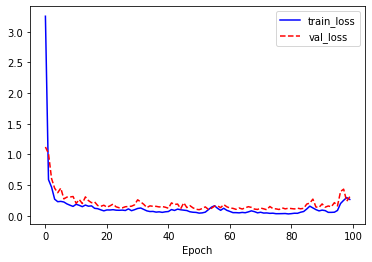

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label='train_loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
#legend는 범례 -> 아무것도 설정 안하고 그냥 하면 최적으로 알아서 그림
plt.legend()
plt.show()

In [16]:
model.evaluate(test_X, test_Y)
#좋은 성적이 아니다.

4/4 [==============================] - 0s 4ms/step - loss: 0.3252


0.3252488672733307

In [17]:
# 회귀 모델 만들기[신경망] -> 중간에 중단하는 방법

#unit값을 정할 때, 처음에는 많은 units값이 좋음 -> 신경망층 깊어질수록 조금씩 줄이기
model=tf.keras.Sequential([
                     tf.keras.layers.Dense(units=100, activation='relu',input_shape=(13, )),
                     tf.keras.layers.Dense(units=52, activation='relu'),
                     tf.keras.layers.Dense(units=32, activation='relu'),
                     tf.keras.layers.Dense(units=26, activation='relu'),
                     tf.keras.layers.Dense(units=13, activation='relu'),
                     tf.keras.layers.Dense(units=1)
])

model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.001), loss='mse')

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 100)               1400      
_________________________________________________________________
dense_15 (Dense)             (None, 52)                5252      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                1696      
_________________________________________________________________
dense_17 (Dense)             (None, 26)                858       
_________________________________________________________________
dense_18 (Dense)             (None, 13)                351       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 14        
Total params: 9,571
Trainable params: 9,571
Non-trainable params: 0
____________________________________________________

In [18]:
#epoch값이 5개가 진행되는동안 나아진 것이 없으면 중단(대상: val_loss)
history=model.fit(train_X, train_Y, epochs=500, batch_size=32, validation_split=0.25,
                  callbacks=[tf.keras.callbacks.EarlyStopping(patience=5,monitor='val_loss')])

Epoch 1/500
10/10 [==============================] - 1s 20ms/step - loss: 0.8788 - val_loss: 1.0050
Epoch 2/500
10/10 [==============================] - 0s 6ms/step - loss: 0.6850 - val_loss: 0.7649
Epoch 3/500
10/10 [==============================] - 0s 6ms/step - loss: 0.4454 - val_loss: 0.5555
Epoch 4/500
10/10 [==============================] - 0s 5ms/step - loss: 0.2558 - val_loss: 0.3714
Epoch 5/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1844 - val_loss: 0.2677
Epoch 6/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1897 - val_loss: 0.2325
Epoch 7/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1442 - val_loss: 0.2131
Epoch 8/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1247 - val_loss: 0.1963
Epoch 9/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1536 - val_loss: 0.1838
Epoch 10/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1124 - val_loss: 0.1703
Epoch 11

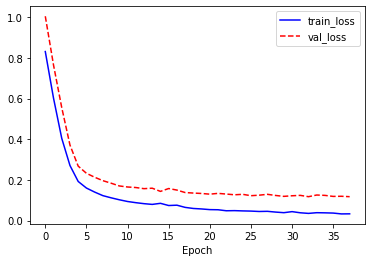

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label='train_loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
#legend는 범례 -> 아무것도 설정 안하고 그냥 하면 최적으로 알아서 그림
plt.legend()
plt.show()

In [20]:
model.evaluate(test_X, test_Y)
#앞에 결과는 상대적으로 낮은 수치가 나왔다.

4/4 [==============================] - 0s 3ms/step - loss: 0.2378


0.2378174215555191

In [ ]:
# 조기 중단을 수행한 모델이 학습이 더 잘 되었다.